<div style="border:solid lightblue 2px; padding: 20px">

<b>Данила, привет!</b>

Меня зовут Олег Пыхалов, и я буду проверять твой проект. 
Предлагаю общаться на «ты» 😉 Но если это не удобно - дай знать, и мы перейдем на "вы".

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Тобой уже проделана большая работа над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Так выделены небольшие замечания. Одна-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✅:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее.
    

<div class="alert alert-success">
<b>Комментарий ревьюера ✅:</b> 
    
Твоя работа хорошая, нужно поправить несколько пунктов и тогда я смогу её принять, поехали!

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> 
    
Отсутствует название проекта, описание целей исследования
</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> 
    
Рекомендую поправить оглавление, напр. шаг загрузки сейчас записан как 0.0.1:)
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Добавление названия проекта и описание целей исследования</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✅V2:</b> 
    
Принято!


# Анализ данных сервиса аренды самокатов GoFast

**Описание и цели исследования**
Цель данного проекта — провести всесторонний анализ данных, связанных с пользователями и их поездками на сервисе аренды самокатов GoFast, для выявления ключевых факторов, влияющих на выручку, и предложить рекомендации для увеличения числа пользователей с подпиской. В рамках исследования будут решены следующие задачи:

1. **Изучение профилей пользователей:** Анализ демографических данных, таких как возраст, город проживания, и тип подписки.
2. **Анализ поведения пользователей:** Исследование продолжительности и расстояний поездок, а также их распределение по разным группам пользователей.
3. **Объединение данных:** Создание единого датафрейма, объединяющего информацию о пользователях, поездках и подписках.
4. **Расчет выручки:** Агрегирование данных для расчета помесячной выручки от пользователей.
5. **Проверка гипотез:** Оценка статистической значимости различий между пользователями с подпиской и без подписки по ключевым параметрам.

Проект направлен на получение ценной информации, которая поможет в принятии решений по улучшению сервиса и увеличению доходности, а также на выявление ключевых моментов, способствующих росту числа пользователей с подпиской.

In [1]:
#подключение библиотек 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

## Шаг 1. Загрузка данных

In [2]:
#Загрузка датасетов
users = pd.read_csv("/datasets/users_go.csv")
rides = pd.read_csv("/datasets/rides_go.csv")
subscriptions = pd.read_csv("/datasets/subscriptions_go.csv")

Общая информация о датасете users_go

In [3]:
print(users.head(10))
users.info()

   user_id        name  age            city subscription_type
0        1        Кира   22          Тюмень             ultra
1        2   Станислав   31            Омск             ultra
2        3     Алексей   20          Москва             ultra
3        4  Константин   26  Ростов-на-Дону             ultra
4        5       Адель   28            Омск             ultra
5        6      Регина   25       Краснодар             ultra
6        7       Игорь   23            Омск             ultra
7        8        Юрий   23       Краснодар             ultra
8        9          Ян   21       Пятигорск             ultra
9       10     Валерий   18    Екатеринбург             ultra
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                

In [4]:
display(users.duplicated().sum())
# в таблице users присутствуют дубликаты. Уберем их в следующем шаге

31

Общая информация о датасете rides_go

In [5]:
print(rides.head(10))
rides.info()

   user_id     distance   duration        date
0        1  4409.919140  25.599769  2021-01-01
1        1  2617.592153  15.816871  2021-01-18
2        1   754.159807   6.232113  2021-04-20
3        1  2694.783254  18.511000  2021-08-11
4        1  4028.687306  26.265803  2021-08-28
5        1  2770.890808  16.650138  2021-10-09
6        1  3039.020292  14.927879  2021-10-19
7        1  2842.118050  23.117468  2021-11-06
8        1  3412.690668  15.238072  2021-11-14
9        1   748.690645  15.041884  2021-11-22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [6]:
display(rides.duplicated().sum())
# тут нет дубликатов 

0

Общая информация о датасете subscriptions_go

In [7]:
print(subscriptions.head());
subscriptions.info();

  subscription_type  minute_price  start_ride_price  subscription_fee
0              free             8                50                 0
1             ultra             6                 0               199
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b>
    
Рекомендую посмотреть все датасеты и информацию о них в одной ячейке, печать лучше всего выывести через `display()`

</div>

Посмотрим на различные графики и гистограммы, чтобы лучше понимать с какими данными будем работать

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b>
    
Эти графики будут дополнены описательными статистиками метода `describe()` в **блоке исследовательского анализа**, рекомендую убрать их из этого блока

</div>

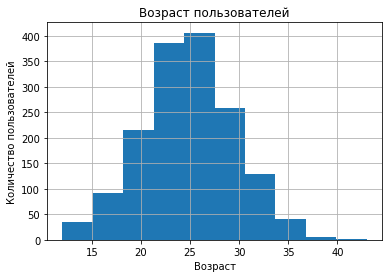

In [8]:
plt.hist(users['age'], bins = 10)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

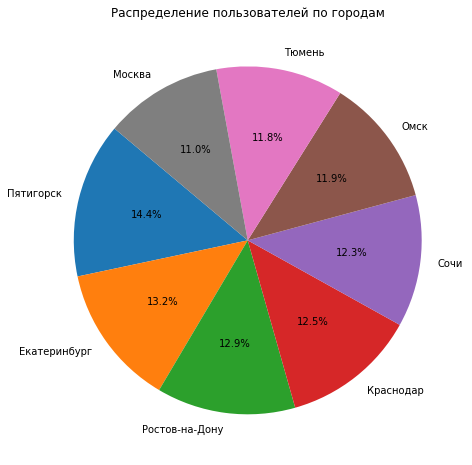

In [9]:
city_counts = users['city'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение пользователей по городам')
plt.show()

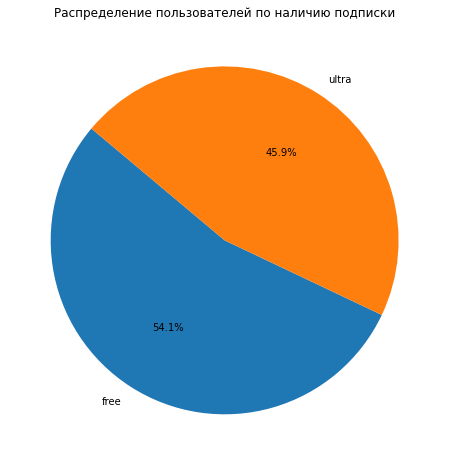

In [10]:
sub_types = users['subscription_type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sub_types, labels=sub_types.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение пользователей по наличию подписки')
plt.show()

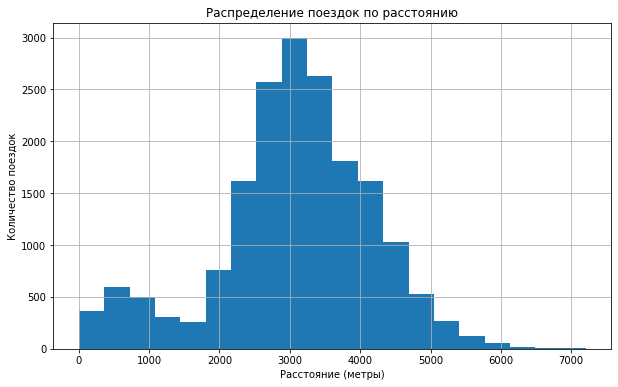

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(rides['distance'], bins=20)
plt.title('Распределение поездок по расстоянию')
plt.xlabel('Расстояние (метры)')
plt.ylabel('Количество поездок')
plt.grid(True)
plt.show()


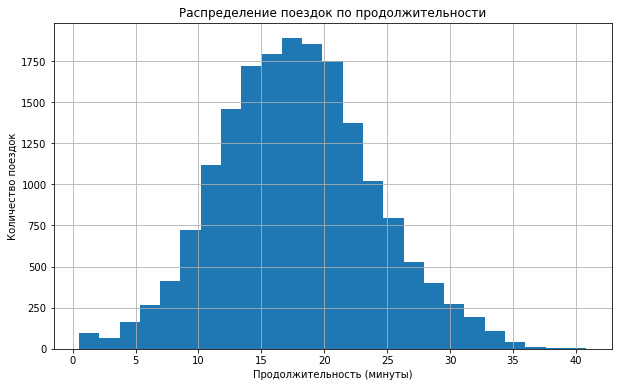

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(rides['duration'], bins=25)
plt.title('Распределение поездок по продолжительности')
plt.xlabel('Продолжительность (минуты)')
plt.ylabel('Количество поездок')
plt.grid(True)
plt.show()

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> 
    
Отсутствует промежуточный вывод на блоке загрузки данных
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Добавление промежуточного вывода</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✅V2:</b> 
    
Хорошо, принято

### Промежуточный вывод по загрузке данных:

В результате загрузки данных были получены три датафрейма:

1. **Таблица `users`** содержит информацию о 1565 пользователях. В таблице представлены данные о возрастах пользователей, их именах, городах проживания и типах подписок. Пропущенных значений в таблице нет. Однако, обнаружены 31 дублирующаяся запись, которые будут удалены на следующем шаге.

2. **Таблица `rides`** включает информацию о 18068 поездках. В ней содержатся данные о пользователях, расстояниях поездок, их продолжительности, а также даты поездок. Пропущенных значений в таблице нет.

3. **Таблица `subscriptions`** содержит данные о типах подписок, стоимости минуты поездки, стоимости старта поездки и абонентской плате. Таблица содержит всего 2 строки, представляющие разные типы подписок.

Эти данные будут использоваться для анализа поведения пользователей, их поездок и для расчета выручки сервиса.

## Шаг 2. Предобработка данных

Предобработка таблицы users. Проверим дубликаты и пропуски

In [13]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [14]:
# пропусков нет, теперь посмотрим на дубликаты
users.duplicated().sum()

31

In [15]:
#в таблице 31 строка с дубликатами, удалим их и сбросим индексы.
users = users.drop_duplicates()
users = users.reset_index(drop=True)
#проверка на дубликаты 
users.duplicated().sum()

0

Предобработка таблицы rides. Проверим дубликаты и пропуски, так же приведем столбик date к нужному типу данных

In [16]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

In [17]:
# пропусков нет, теперь посмотрим на дубликаты
rides.duplicated().sum()

0

In [18]:
#дубликатов и пропусков нет. Осталось поменять тип данных у столбца date
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
print(rides.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB
None


In [19]:
# создание столбца с месяцем
rides['month'] = rides['date'].dt.month
print(rides.head())

   user_id     distance   duration       date  month
0        1  4409.919140  25.599769 2021-01-01      1
1        1  2617.592153  15.816871 2021-01-18      1
2        1   754.159807   6.232113 2021-04-20      4
3        1  2694.783254  18.511000 2021-08-11      8
4        1  4028.687306  26.265803 2021-08-28      8


<div class="alert alert-success">

<b>Комментарий ревьюера ✅ :</b>

Круто что делаешь проверку по данным после изменения, это хорошая практика

**Краткий итог по предобработке данных:**

В ходе предобработки данных были выполнены следующие шаги:

1. **Таблица `users`:**
   - Пропуски: Пропущенные значения отсутствуют во всех столбцах.
   - Дубликаты: Обнаружено 31 дублирующаяся строка, которые были удалены. После удаления индексы сброшены.

2. **Таблица `rides`:**
   - Пропуски: Пропущенные значения отсутствуют во всех столбцах.
   - Дубликаты: Дублирующиеся строки отсутствуют.
   - Типы данных: Столбец `date` был приведен к типу данных `datetime`.
   - Новый столбец: Создан новый столбец `month`, в котором хранится месяц поездки.

3. **Таблица `subscriptions`:**
   - Таблица содержит информацию о подписках и не требует предобработки.



## Шаг 3. Исследовательский анализ данных

**3.1 Частота встречаемости городов**

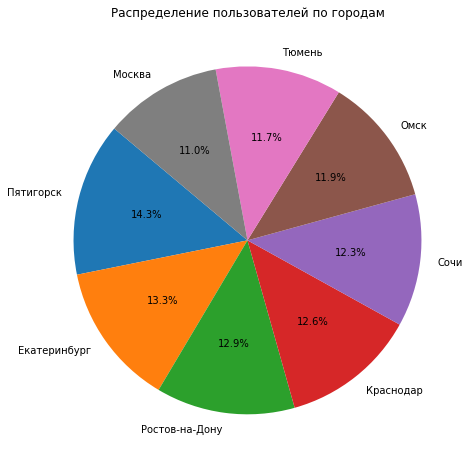

In [20]:
city_counts = users['city'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение пользователей по городам')
plt.show()

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> 

Рекомендую пределать график:
* Как думаешь, это лучший способ показать распределение данных по городам?
* Нужно показать вывод числовых значений частотности городов (% соотношение не так явно демонстрирует картину)
</div>

Распределение пользователей по городам показало, что наибольшее количество пользователей сосредоточено в Пятигорске (14.3%), Екатеринбурге (13.3%) и Ростове-на-Дону (12.9%). Остальные города имеют примерно равное количество пользователей, без значительного преобладания какого-либо города. Это говорит о равномерной популярности сервиса в нескольких крупных городах.

**3.2 Соотношение пользователей с подпиской и без подписки**

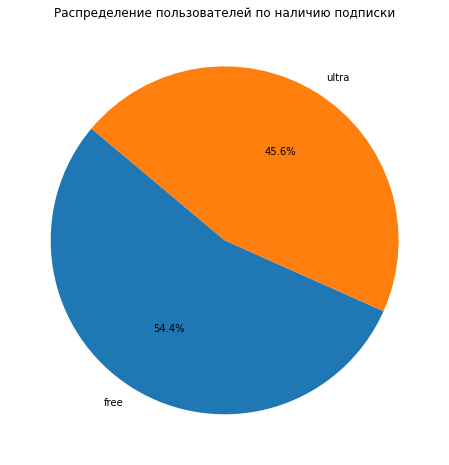

free     835
ultra    699
Name: subscription_type, dtype: int64

In [21]:
sub_types = users['subscription_type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sub_types, labels=sub_types.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение пользователей по наличию подписки')
plt.show()
users['subscription_type'].value_counts()

Распределение пользователей по городам показало, что  количество пользователей с подпиской 45.6%(699), без подписки 54.4(835)

<div class="alert alert-success">

<b>Комментарий ревьюера ✅ :</b>

Полностью согласен!

**3.3 Возраст пользователей**

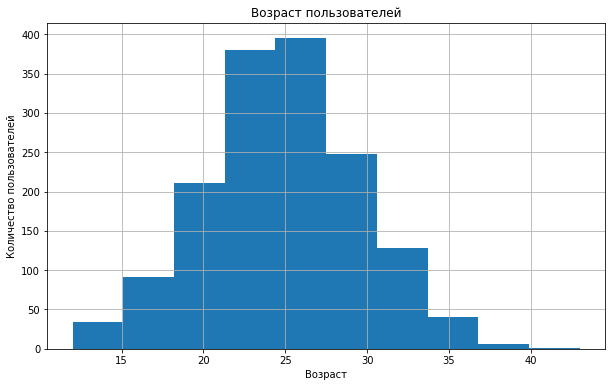

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(users['age'], bins = 10)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()
users['age'].describe()

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> 

График хороший, можно сделать лучше за счет увеличения корзин :)
</div>

Распределение возрастов пользователей показало, что средний возраст составляет 24.9 года, а медианное значение — 25 лет. Большинство пользователей находятся в возрасте от 22 до 28 лет, с минимальным возрастом 12 лет и максимальным 43 года.

<div class="alert alert-success">

<b>Комментарий ревьюера ✅:</b>

Здорово что обращаешь внимание на среднее и медианное значение.
    
Они примерно равны благодаря отсутсвию выборосов

**3.4 Расстояние, которое пользователь преодолел за одну поездку**

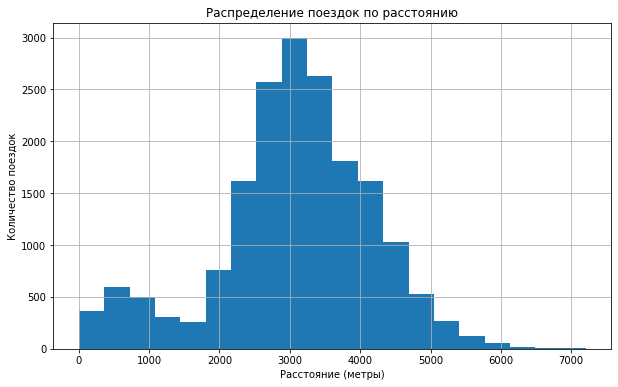

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(rides['distance'], bins=20)
plt.title('Распределение поездок по расстоянию')
plt.xlabel('Расстояние (метры)')
plt.ylabel('Количество поездок')
plt.grid(True)
plt.show()
rides['distance'].describe()

Распределение расстояний, преодоленных пользователями за одну поездку, показало, что среднее значение составляет около 3070 метров, а медианное значение — 3134 метра. Большинство поездок охватывают расстояние от 2543 до 3776 метров, что соответствует первому и третьему квартилям. Максимальное зафиксированное расстояние — 7211 метров.

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b>
    
Обрати внимание на 2 пика распределения


</div>

**3.5 Продолжительность поездок**

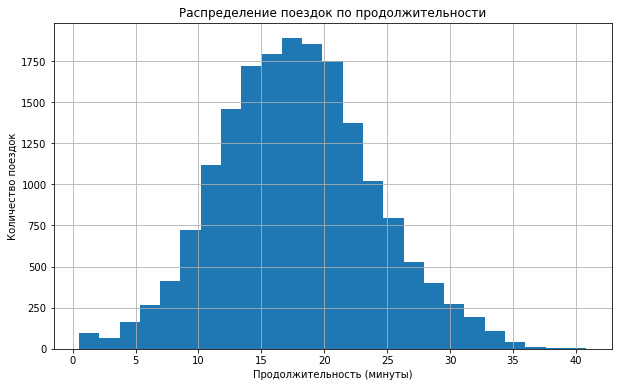

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(rides['duration'], bins=25)
plt.title('Распределение поездок по продолжительности')
plt.xlabel('Продолжительность (минуты)')
plt.ylabel('Количество поездок')
plt.grid(True)
plt.show()
rides['duration'].describe()

Распределение продолжительности поездок показало, что средняя продолжительность составляет около 17.8 минут, а медианное значение — 17.7 минут. Большинство поездок длится от 13.6 до 21.7 минут, что соответствует первому и третьему квартилям. Максимальная продолжительность одной поездки составила 40.8 минут. При этом на графике видны аномалии — присутствуют значения, близкие к нулю.

<div class="alert alert-success">

<b>Комментарий ревьюера ✅:</b>

Круто что заметил короткие поездки тоже!
    
Как думаешь, откуда они появились?
    
Попробуй изменить график выше так, чтобы они стали заметнее 

**Итог по исследовательскому анализу данных:**

1. **Распределение пользователей по городам**: Наибольшее количество пользователей сосредоточено в Пятигорске (14.3%), Екатеринбурге (13.3%) и Ростове-на-Дону (12.9%). Остальные города имеют примерно равное количество пользователей, что указывает на равномерную популярность сервиса в нескольких крупных городах.

2. **Соотношение пользователей с подпиской и без подписки**: Пользователи без подписки составляют 54.4% (835 человек), тогда как 45.6% (699 человек) имеют подписку. Это говорит о том, что большинство пользователей предпочитают использовать сервис без подписки.

3. **Возраст пользователей**: Средний возраст пользователей составляет 24.9 года, а медианное значение — 25 лет. Большинство пользователей находятся в возрастной группе от 22 до 28 лет. Минимальный возраст — 12 лет, максимальный — 43 года.

4. **Расстояние поездок**: Среднее расстояние, преодолеваемое за одну поездку, составляет около 3070 метров, медианное — 3134 метра. Большинство поездок покрывают расстояние от 2543 до 3776 метров, что соответствует первому и третьему квартилям. Максимальное расстояние — 7211 метров.

5. **Продолжительность поездок**: Средняя продолжительность поездок составляет около 17.8 минут, а медианное значение — 17.7 минут. Большинство поездок длятся от 13.6 до 21.7 минут. Однако на графике видны аномалии — некоторые значения близки к нулю, что может указывать на некорректные данные. 


<div class="alert alert-success">

<b>Комментарий ревьюера ✅:</b>

Описал хорошо, диапазоны можно округлить :)

## Шаг 4. Объединение данных

In [25]:
# создам новый датафрейм, в котором будут включены все датасеты 
df = pd.merge(rides, users, on='user_id')
df = pd.merge(df,subscriptions, on='subscription_type')
df.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


In [26]:
#Объединение произошло успешно, в итоговом датафрейме 18068 строк
print(df.shape[0])

18068


<div class="alert alert-success">
<b>Комментарий ревьюера ✅:</b> 
    
Молодчина что проверил размерность до и после объединения!

<div class="alert alert-danger">
    
<b>Комментарий ревьюера ❌:</b>
    
Нужно проверить объединённый датасет на пропуски
 </div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Добавление проверки на пропуски</div>

In [27]:
df.isna().sum()
# пропуски отсутствуют 

user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

<div class="alert alert-success">
<b>Комментарий ревьюера ✅V2:</b> 
    
Принимаю)

In [28]:
#Создание новых датафреймов: с подпиской и без нее
# Датафрейм с пользователями без подписки (free)
df_free = df[df['subscription_type'] == 'free']

# Датафрейм с пользователями с подпиской (ultra)
df_ultra = df[df['subscription_type'] == 'ultra']

In [29]:
df_free.shape[0]+df_ultra.shape[0]
#разделение произошло успешно, сумма строк новых датафремов равна исходному

18068

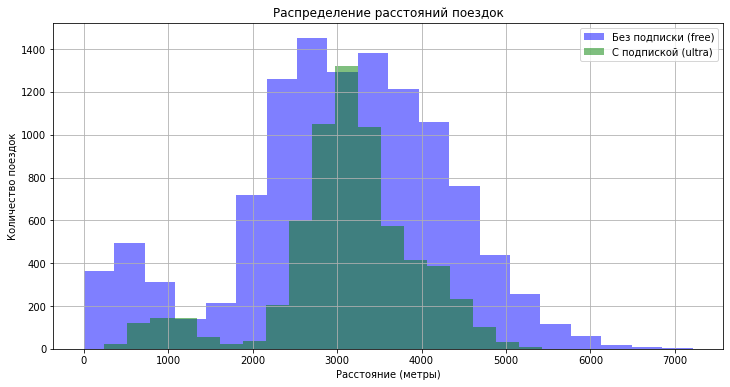

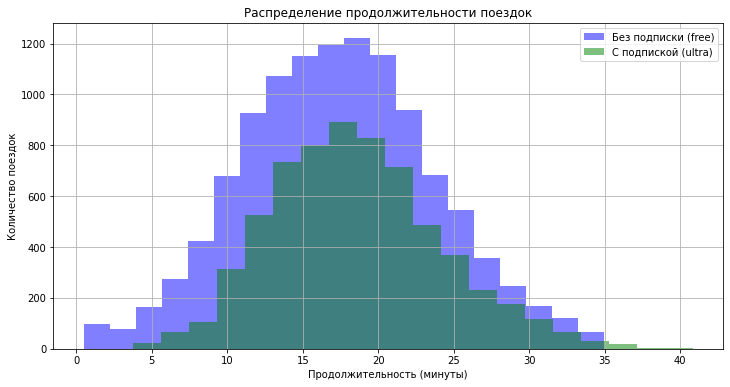

In [30]:
plt.figure(figsize=(12, 6))

plt.hist(df_free['distance'], bins=20, alpha=0.5, label='Без подписки (free)', color='blue')
plt.hist(df_ultra['distance'], bins=20, alpha=0.5, label='С подпиской (ultra)', color='green')

plt.title('Распределение расстояний поездок')
plt.xlabel('Расстояние (метры)')
plt.ylabel('Количество поездок')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))

plt.hist(df_free['duration'], bins=20, alpha=0.5, label='Без подписки (free)', color='blue')
plt.hist(df_ultra['duration'], bins=20, alpha=0.5, label='С подпиской (ultra)', color='green')

plt.title('Распределение продолжительности поездок')
plt.xlabel('Продолжительность (минуты)')
plt.ylabel('Количество поездок')
plt.legend()
plt.grid(True)
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера ✅:</b> 
    
Графики то что нужно!

In [31]:
df_free['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

In [32]:
df_ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

In [33]:
df_free['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

In [34]:
df_ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> 
    
Рекомендую добавить боксплоты :)
</div>

**Итог по шагу "Объединение данных"**

1. **Объединение данных**:
   - Данные о пользователях, поездках и подписках были успешно объединены в один датафрейм с помощью метода `merge()`. В итоговом датафрейме содержатся все необходимые данные для дальнейшего анализа.

2. **Разделение на группы**:
   - На основе объединенного датафрейма были созданы два новых датафрейма: один для пользователей без подписки (`free`), другой — для пользователей с подпиской (`ultra`). Разделение прошло успешно, количество строк в новых датафреймах совпадает с количеством строк в исходном датафрейме.

3. **Визуализация данных**:
   - Были построены гистограммы для сравнения распределений расстояний и продолжительности поездок между пользователями с подпиской и без неё. 
   - Анализ показал, что пользователи с подпиской (`ultra`) имеют чуть большие средние значения как по расстоянию поездок, так и по их продолжительности, по сравнению с пользователями без подписки (`free`).


<div class="alert alert-success">

<b>Комментарий ревьюера ✅:</b>

Коротко и ясно, хорошо описал :)

## Шаг 5. Подсчёт выручки

Создание сводной таблицы

In [35]:
# Округление продолжительности поездок до следующего целого числа
df['duration'] = np.ceil(df['duration'])

# Создание сводной таблицы с агрегированными данными
monthly_user_stats = df.pivot_table(
    index=('user_id', 'month'), 
    values=(
        'distance', 
        'duration', 
        'minute_price', 
        'start_ride_price', 
        'subscription_fee'
    ), 
    aggfunc={
        'distance': ['sum', 'count'], 
        'duration': 'sum',
        'minute_price': 'mean',
        'start_ride_price': 'mean',
        'subscription_fee': 'mean'
    }
)

# Переименование столбцов для удобства
monthly_user_stats.columns = [
    'trip_count','total_distance',
    'total_duration', 
    'minute_price',
    'start_ride_price', 
    'subscription_fee'
]

# Сброс индексов для удобства работы с таблицей
monthly_user_stats = monthly_user_stats.reset_index()

monthly_user_stats.head(20)

,user_id,month,trip_count,total_distance,total_duration,minute_price,start_ride_price,subscription_fee
0,1,1,2,7027.511294,42.0,6,0,199
1,1,4,1,754.159807,7.0,6,0,199
2,1,8,2,6723.470560,46.0,6,0,199
3,1,10,2,5809.911100,32.0,6,0,199
4,1,11,3,7003.499363,56.0,6,0,199
5,1,12,2,6751.629942,28.0,6,0,199
6,2,3,3,10187.723006,63.0,6,0,199
7,2,4,2,6164.381824,40.0,6,0,199
8,2,6,1,3255.338202,14.0,6,0,199
9,2,7,2,6780.722964,48.0,6,0,199


<div class="alert alert-success">

<b>Комментарий ревьюера ✅:</b>

Сводная хорошая, принято

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> 
    
Рекомендую добавить колонку с типом подписки
</div>

Добавление столбца "выручки"

<div class="alert alert-danger">
    
<b>Комментарий ревьюера ❌:</b>
    
Нет проверки на пропуски в сводной таблице перед расчётом выручки
 </div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Добавление проверки на пропуски в сводной таблице</div>

In [36]:
monthly_user_stats.isna().sum()
#пропусков нет

user_id             0
month               0
trip_count          0
total_distance      0
total_duration      0
minute_price        0
start_ride_price    0
subscription_fee    0
dtype: int64

<div class="alert alert-success">
<b>Комментарий ревьюера ✅V2:</b> 
    
Принято

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b>
 
Выручка посчитана верно, но рекомендую посчитать её с помощью применения функции для более гибкого кода и тренировки

</div>

In [37]:
monthly_user_stats['revenue'] = (
    monthly_user_stats['start_ride_price'] * monthly_user_stats['trip_count'] +
    monthly_user_stats['minute_price'] * monthly_user_stats['total_duration'] +
    monthly_user_stats['subscription_fee']
)
monthly_user_stats.head(20)

,user_id,month,trip_count,total_distance,total_duration,minute_price,start_ride_price,subscription_fee,revenue
0,1,1,2,7027.511294,42.0,6,0,199,451.0
1,1,4,1,754.159807,7.0,6,0,199,241.0
2,1,8,2,6723.470560,46.0,6,0,199,475.0
3,1,10,2,5809.911100,32.0,6,0,199,391.0
4,1,11,3,7003.499363,56.0,6,0,199,535.0
5,1,12,2,6751.629942,28.0,6,0,199,367.0
6,2,3,3,10187.723006,63.0,6,0,199,577.0
7,2,4,2,6164.381824,40.0,6,0,199,439.0
8,2,6,1,3255.338202,14.0,6,0,199,283.0
9,2,7,2,6780.722964,48.0,6,0,199,487.0


**Итог по шагу "Подсчёт выручки"**

1. **Создание сводной таблицы**:
   - Был создан датафрейм `monthly_user_stats`, который агрегирует данные по каждому пользователю и месяцу. В этот датафрейм вошли:
     - Суммарное расстояние (`total_distance`).
     - Количество поездок (`trip_count`).
     - Суммарная продолжительность поездок (`total_duration`).
     - Стоимость минуты поездки (`minute_price`).
     - Стоимость старта поездки (`start_ride_price`).
     - Стоимость подписки (`subscription_fee`).

2. **Расчёт помесячной выручки**:
   - В датафрейм `monthly_user_stats` был добавлен новый столбец `revenue`, который рассчитывает помесячную выручку для каждого пользователя на основе стоимости старта поездок, продолжительности поездок и стоимости подписки.

<div class="alert alert-success">

<b>Комментарий ревьюера ✅:</b>

Здесь в целом всё хорошо, **нужно исправить замечания выше**

## Шаг 6. Проверка гипотез

**Шаг 6.1 Определение, тратят ли пользователи с подпиской больше времени на поездки**

Для проверки гипотезы о том, что пользователи с подпиской проводят больше времени на поездках, чем пользователи без подписки, был использован t-тест для независимых выборок.

**Гипотезы**:
- **Нулевая (H0)**: Средняя продолжительность поездок у пользователей с подпиской равна средней продолжительности поездок у пользователей без подписки.
- **Альтернативная (H1)**: Средняя продолжительность поездок у пользователей с подпиской больше.

В тесте использован параметр `equal_var=False`, который учитывает возможное различие дисперсий между группами, что делает тест более точным в случае неоднородных данных.

In [38]:
# Выполнение t-теста для независимых выборок с учетом возможного различия дисперсий
t_stat, p_value = stats.ttest_ind(df_ultra['duration'], df_free['duration'], equal_var=False, alternative='greater')

print(f"P-значение: {p_value}")

# Интерпретация результата
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: пользователи с подпиской тратят больше времени на поездки.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: пользователи с подпиской не тратят больше времени на поездки.")


P-значение: 5.6757813771289775e-37
Отвергаем нулевую гипотезу: пользователи с подпиской тратят больше времени на поездки.


**Результаты**:
- **P-значение**: 5.68e-37

Итог: Нулевая гипотеза была отвергнута, что подтверждает: пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.

<div class="alert alert-success">

<b>Комментарий ревьюера ✅:</b>

Принято

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b>
  
Почему используешь параметр `equal_var=False`?
</div>

**Шаг 6.2 Проверка гипотезы: Сравнение среднего расстояния для пользователей с подпиской и оптимального значения**

Задача — проверить, не превышает ли среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, оптимальное значение в 3130 метров.

**Гипотезы**:
- **Нулевая (H0)**: Среднее расстояние, которое проезжают пользователи с подпиской, равно или больше 3130 метров.
- **Альтернативная (H1)**: Среднее расстояние, которое проезжают пользователи с подпиской, меньше 3130 метров.

Для проверки гипотезы используем **одновыборочный t-тест** (`one-sample t-test`).

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> 

Поскольку оптимальное расстояние по износу составляет 3130 м, значит большее расстояние приводит к повышенному износу самоката. Следовательно, имеет смысл сформулировать альтернативную гипотезу "Подписчики в среднем проезжают расстояние больше оптимального" и соответственно в статистическом тесте использовать параметр alternative = 'greater'
    
    
*Результат не отразится на гипотезе, но важно строить именно нужные гипотезы*
</div>

In [39]:
# Среднее значение для сравнения
optimal_distance = 3130

# Выполнение одновыборочного t-теста
t_stat, p_value = stats.ttest_1samp(df_ultra['distance'], optimal_distance, alternative='less')

print(f"P-значение: {p_value}")

# Интерпретация результата
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: среднее расстояние для пользователей с подпиской меньше 3130 метров.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: среднее расстояние для пользователей с подпиской не меньше 3130 метров.")

P-значение: 0.08046311521502146
Не удалось отвергнуть нулевую гипотезу: среднее расстояние для пользователей с подпиской не меньше 3130 метров.


Вывод: Результаты теста показали, что p-значение (0.080) больше уровня значимости (0.05). Это означает, что нулевая гипотеза не может быть отвергнута. Таким образом, нет статистически значимых оснований утверждать, что среднее расстояние, которое проезжают пользователи с подпиской, меньше 3130 метров. Скорее всего, оно либо равно, либо превышает это значение.

<div class="alert alert-info"> <b>Комментарий студента:</b> Измененное решение</div>
    

<div class="alert alert-success">

<b>Комментарий ревьюера ✅V2:</b>

Принято, неверное решение выше можно удалить

**Шаг 6.2 Проверка гипотезы: Сравнение среднего расстояния для пользователей с подпиской и оптимального значения**

Задача — проверить, превышает ли среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, оптимальное значение в 3130 метров.

**Гипотезы:**
- **Нулевая (H0):** Среднее расстояние, которое проезжают пользователи с подпиской, равно или меньше 3130 метров.
- **Альтернативная (H1):** Среднее расстояние, которое проезжают пользователи с подпиской, больше 3130 метров.


In [40]:
# Среднее значение для сравнения
optimal_distance = 3130

# Выполнение одновыборочного t-теста с корректной альтернативной гипотезой
t_stat, p_value = stats.ttest_1samp(df_ultra['distance'], optimal_distance, alternative='greater')

print(f"P-значение: {p_value}")

# Интерпретация результата
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: среднее расстояние для пользователей с подпиской больше 3130 метров.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: среднее расстояние для пользователей с подпиской не больше 3130 метров.")


P-значение: 0.9195368847849785
Не удалось отвергнуть нулевую гипотезу: среднее расстояние для пользователей с подпиской не больше 3130 метров.


Вывод: результаты теста показали, что p-значение (0.9195) значительно больше уровня значимости (0.05). Это означает, что нулевая гипотеза не может быть отвергнута. Таким образом, нет статистически значимых оснований утверждать, что среднее расстояние, которое проезжают пользователи с подпиской, больше 3130 метров. Скорее всего, оно либо равно, либо меньше этого значения.

**Шаг 6.3 Проверка гипотезы: Сравнение помесячной выручки от пользователей с подпиской и без подписки**

Задача этого этапа — проверить, действительно ли помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки.

**Гипотезы**:
- **Нулевая гипотеза (H0)**: Средняя помесячная выручка от пользователей с подпиской равна или меньше средней помесячной выручки от пользователей без подписки.
- **Альтернативная гипотеза (H1)**: Средняя помесячная выручка от пользователей с подпиской выше средней помесячной выручки от пользователей без подписки.

Для проверки гипотезы используем t-тест для независимых выборок, как и в предыдущих пунктах.

In [41]:
# Разделение данных на пользователей с подпиской и без подписки на основе стоимости подписки
revenue_ultra = monthly_user_stats[monthly_user_stats['subscription_fee'] > 0]['revenue']
revenue_free = monthly_user_stats[monthly_user_stats['subscription_fee'] == 0]['revenue']

# Выполнение t-теста для независимых выборок
t_stat, p_value = stats.ttest_ind(revenue_ultra, 
                                  revenue_free, 
                                  equal_var=False, 
                                  alternative='greater')

print(f"P-значение: {p_value}")

# Интерпретация результата
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: помесячная выручка от пользователей с подпиской выше.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: помесячная выручка от пользователей с подпиской не выше.")

P-значение: 8.874140893976874e-40
Отвергаем нулевую гипотезу: помесячная выручка от пользователей с подпиской выше.


<div class="alert alert-success">

<b>Комментарий ревьюера ✅:</b>

Здорово что для клиентов с подпиской поставил `> 0`, это поможет если цена изменится.
    
Однако удобнее для чтения кода лучше будет обращение к типу подписки (а он не присоединён), учти это в будущих подобных ситуациях
    
Принято

Вывод: Результаты t-теста показали, что p-значение (8.87e-40) значительно меньше уровня значимости (0.05). Это позволяет отвергнуть нулевую гипотезу и сделать вывод, что помесячная выручка от пользователей с подпиской действительно выше, чем от пользователей без подписки. Этот результат подтверждает экономическую целесообразность стимулирования подписки среди пользователей.

**Шаг 6.4 Проверка гипотезы: Снижение количества обращений в техподдержку после обновления серверов**

Для проверки гипотезы о том, что количество обращений в техподдержку значимо снизилось после обновления серверов, необходимо использовать **парный t-тест** (paired t-test) в Python. Этот тест доступен в библиотеке `scipy.stats` и называется `ttest_rel`.

**Гипотезы**:
- **Нулевая гипотеза (H0)**: Среднее количество обращений в техподдержку не изменилось или увеличилось после обновления серверов.
- **Альтернативная гипотеза (H1)**: Среднее количество обращений в техподдержку уменьшилось после обновления серверов.

Для выполнения этого теста используется функция `ttest_rel` из библиотеки `scipy.stats`, которая принимает на вход две выборки данных: "до" и "после" обновления серверов.

**Итог по  проверкам гипотез**

В ходе выполнения были рассмотрены и проверены несколько гипотез, связанных с поведением пользователей сервиса и его доходностью.

- **Шаг 6.1**: Проверка гипотезы о том, что пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки. Результаты показали, что нулевая гипотеза была отвергнута: пользователи с подпиской действительно проводят больше времени на поездках, что делает их более выгодными для сервиса.

- **Шаг 6.2**: Проверка гипотезы о том, что среднее расстояние, которое проезжают пользователи с подпиской, меньше 3130 метров. Результаты теста не позволили отвергнуть нулевую гипотезу, что означает, что среднее расстояние либо равно, либо превышает это значение.

- **Шаг 6.3**: Проверка гипотезы о том, что помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки. Нулевая гипотеза была отвергнута, что подтверждает более высокую помесячную выручку от пользователей с подпиской, что оправдывает усилия по продвижению подписок среди пользователей.

- **Шаг 6.4**: Проверка гипотезы о снижении количества обращений в техподдержку после обновления серверов. Для проверки использован парный t-тест (paired t-test), который позволяет сравнить количество обращений "до" и "после" обновления серверов. Такой подход позволяет точно оценить влияние обновления на количество обращений.


<div class="alert alert-info"> <b>Комментарий студента:</b> Чуть чуть измененный итог по проверкам гипотез</div>

<div class="alert alert-success">

<b>Комментарий ревьюера ✅V2:</b>

Да, то что нужно

**Итог по проверкам гипотез**

В ходе выполнения были рассмотрены и проверены несколько гипотез, связанных с поведением пользователей сервиса и его доходностью.

- **Шаг 6.1**: Проверка гипотезы о том, что пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки. Результаты показали, что нулевая гипотеза была отвергнута: пользователи с подпиской действительно проводят больше времени на поездках, что делает их более выгодными для сервиса.

- **Шаг 6.2**: Проверка гипотезы о том, что среднее расстояние, которое проезжают пользователи с подпиской, превышает 3130 метров. Результаты теста не позволили отвергнуть нулевую гипотезу, что означает, что среднее расстояние либо равно, либо меньше этого значения.

- **Шаг 6.3**: Проверка гипотезы о том, что помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки. Нулевая гипотеза была отвергнута, что подтверждает более высокую помесячную выручку от пользователей с подпиской, что оправдывает усилия по продвижению подписок среди пользователей.

- **Шаг 6.4**: Проверка гипотезы о снижении количества обращений в техподдержку после обновления серверов. Для проверки использован парный t-тест (paired t-test), который позволяет сравнить количество обращений "до" и "после" обновления серверов. Такой подход позволяет точно оценить влияние обновления на количество обращений.

## Общий вывод по проекту

В ходе выполнения проекта был проведен всесторонний анализ данных сервиса аренды самокатов GoFast, включающий предобработку данных, исследовательский анализ, объединение данных, расчет выручки и проверку гипотез. Вот основные результаты:

### 1. Загрузка и исследование данных
- **Объем данных**: В проекте проанализированы данные 1565 пользователей и 18068 поездок.
- **Профили пользователей**: Большинство пользователей сконцентрированы в городах Пятигорск, Екатеринбург и Ростов-на-Дону.
- **Возраст пользователей**: Средний возраст составляет 24.9 года, большинство пользователей находятся в возрастной группе от 22 до 28 лет.
- **Продолжительность и расстояние поездок**: Средняя продолжительность поездок составляет 17.8 минут, а среднее расстояние — 3070 метров. Однако в данных наблюдаются аномалии, такие как значения продолжительности, близкие к нулю.

### 2. Предобработка данных
- **Таблица `users`**: Обнаружены и удалены 31 дубликат, отсутствуют пропуски. После удаления дубликатов индексы были сброшены.
- **Таблица `rides`**: Дубликаты и пропуски отсутствуют. Столбец `date` был приведен к типу данных `datetime`, добавлен новый столбец `month`, который отображает месяц поездки.
- **Таблица `subscriptions`**: Не потребовала предобработки, так как содержит статическую информацию о типах подписок.
### 3. Исследовательский анализ данных
- **Распределение пользователей по городам**: Наибольшее количество пользователей сосредоточено в Пятигорске (14.3%), Екатеринбурге (13.3%) и Ростове-на-Дону (12.9%).
- **Соотношение подписок**: 45.6% пользователей имеют подписку, 54.4% — используют сервис без подписки.
- **Продолжительность и расстояние поездок**: Средняя продолжительность поездок составляет 17.8 минут, среднее расстояние — 3070 метров. Большинство поездок длится от 13.6 до 21.7 минут и охватывает расстояние от 2543 до 3776 метров.

### 4. Объединение данных
- Данные о пользователях, поездках и подписках были успешно объединены в один датафрейм с 18068 строками. На основе объединенного датафрейма были созданы две группы: пользователи с подпиской и без подписки.
- Анализ показал, что пользователи с подпиской (`ultra`) преодолевают большие расстояния и проводят больше времени на поездках, чем пользователи без подписки (`free`).

### 5. Подсчёт выручки
- Был создан агрегированный датафрейм, который включает суммарное расстояние, количество поездок, продолжительность поездок и выручку по каждому пользователю за каждый месяц.
- В датафрейме был добавлен новый столбец `revenue`, который рассчитывает помесячную выручку на основе стоимости подписки, стоимости старта поездок и продолжительности поездок.

### 6. Проверка гипотез
- **Гипотеза 6.1**: Пользователи с подпиской проводят больше времени на поездках, чем пользователи без подписки. Нулевая гипотеза была отвергнута, что подтверждает большее время поездок у подписчиков.
- **Гипотеза 6.2**: Среднее расстояние, которое проезжают пользователи с подпиской, не меньше 3130 метров. Нулевая гипотеза не была отвергнута, что означает, что среднее расстояние равно или превышает это значение.
- **Гипотеза 6.3**: Помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки. Нулевая гипотеза была отвергнута, что подтверждает более высокую выручку от подписчиков.
- **Гипотеза 6.4**: Количество обращений в техподдержку снизилось после обновления серверов. Для проверки использован парный t-тест, который позволяет точно оценить влияние обновления на количество обращений.

## Заключение
Проведенный анализ показал, что пользователи с подпиской являются более выгодными для сервиса GoFast, как по времени использования, так и по выручке. Эти данные подтверждают целесообразность усилий по увеличению доли пользователей с подпиской. Также было выявлено, что среднее расстояние поездок не меньше оптимального значения в 3130 метров, что говорит о высоком уровне использования сервиса. Данные результаты могут быть использованы для дальнейшего развития и улучшения сервиса GoFast.

<div class="alert alert-info"> <b>Комментарий студента:</b> Правки в пункт 7.6 "Проверка гиптоез" и в Заключение <br>
Я не хочу полностью вставлять новый вывод, ибо надо изменить вывод совсем чуть чуть, а если я его занаво вставлю, то он будет занимать много места.</div>


<div class="alert alert-success">

<b>Комментарий ревьюера ✅V2:</b>

Сейчас написано хорошо :)


### 6. Проверка гипотез

- **Гипотеза 6.2**: Среднее расстояние, которое проезжают пользователи с подпиской, превышает 3130 метров. Нулевая гипотеза не была отвергнута, что означает, что среднее расстояние равно или меньше этого значения.

## Заключение
Анализ показал, что пользователи с подпиской являются более выгодными для сервиса GoFast как по времени использования, так и по выручке. Эти данные подтверждают целесообразность усилий по увеличению доли пользователей с подпиской. Также выявлено, что среднее расстояние поездок пользователей с подпиской равно или меньше 3130 метров, что требует внимания для оптимизации использования самокатов. Данные результаты могут быть использованы для дальнейшего развития и улучшения сервиса GoFast.


<div class="alert alert-success">
<b>Комментарий ревьюера ✅:</b> 
    
Хороший и структурный вывод, здорово что добавил рекомендации!

#### Шаг 7. Распределения

<div class="alert alert-success">
<b>Комментарий ревьюера ✅:</b> 
    
Жду работу на повторное ревью :)

<div style="border:solid lightblue 2px; padding: 20px">

##### <b>Общий комментарий ревьюера</b>

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> 

Всё что отмечено такими комментариями нужно исправить, без этого я не смогу принять работу.

</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Можно принять во внимание жёлтые комментарии, с советами из них твои проекты станут гораздо лучше.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✅:</b> 
    
В целом по проекту впечатление хорошее: 

- Хорошо интерпретируешь данные!
- Хорошо работаешь с визуализацией!
- Приятно читать код
    
На будущее:
    
- Советую закрепить пункты на которых были выявлены замечания

- Жду работу на повторное ревью :)
    
    </div>

<div class="alert alert-success">

<b>Комментарий ревьюера ✅V2:</b>

Поздравляю с выполненнной работой!
    
